In [69]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import re
import requests
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import re
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
import string
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
import plotly.express as px
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm, trange
import json
import time
import torch
import datetime
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, random_split, \
                            DataLoader, RandomSampler, SequentialSampler
from transformers import CamembertForSequenceClassification, CamembertTokenizer, \
                         AdamW, get_linear_schedule_with_warmup

### Importing the Dataset

In [42]:
df = pd.read_csv(r'C:\Users\arceb\PycharmProjects\Projet_DSSS_2023\data_cleaned/initial_corpus.csv')
df

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle",LES SYMBOLES comptent parfois plus que les fai...,"Sur les camions militaires qui, en colonnes, ...",Deux semaines pour se ressaisir et s'unir ou p...,Figaro
1,Le Monde,Récit Les trois semaines qui ont chamboulé l...,2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret...","Londres, Berlin, Rome et Bruxelles corresponda...","- Jeudi 26 mars, les Vingt-Sept devaient se r...","pandémie touche tout le monde, indifféremment ...",Monde
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure ...,2020-03-26,"Tandonnet, Maxime",Fin observateur de la vie politique française ...,"contributeur régulier du FigaroVox, Maxime Tan...",es yeux et de se préparer au changement d’un m...,Figaro
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamb...,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet...","Jeudi 26 mars, les Vingt-Sept doivent se réuni...",n visioconférence pour la troisième fois en mo...,"e la tenue de ses comptes publics, n’est pas s...",Monde
4,Le Monde (site web),Marc Lazar : « Plus l’Italie fait nation face ...,2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à...,date du 25 mars le plus grand nombre de morts...,t de la School of Government de la Luiss (Libr...,Monde
...,...,...,...,...,...,...,...,...
8913,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"La déception a été à la hauteur de l'espoir, i...","nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
8914,La Croix,Migrants en mer Egée : «Ça a été les deux heur...,2020-04-15,NaN,"Les faits En 2015, des «?zones de transit?» av...",nt été mises en place par le pays dans les vil...,programme lancé en 2015 de répartition par Éta...,Croix
8915,Le Figaro,"Migrants: Dakhla, point de départ du grand cou...",2020-04-14,NaN,Bruxelles espère arriver à des « résultats imp...,ants » en 2021 sur la réforme de l'asile prése...,oit d'asile depuis le pays européen où ils son...,Figaro
8916,Le Figaro,Pacte migratoire?: les pays du sud sauveront-i...,2020-04-12,NaN,C'EST L'UNE des rares bonnes nouvelles de l'an...,"2020 : la pandémie, grâce au plan de relance ...",une victoire à la Pyrrhus... Et dans tous les ...,Figaro


### CAMEMBERT

In [3]:
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="Peed911/french_sentiment_analysis")

In [4]:
terms_mentioned_syria = [
    "Syrie", "syrien", "syrienne", "Damas"
]
filtered_articles_syria = df[df["Texte"].str.contains('|'.join(terms_mentioned_syria), case=False)]

terms_mentioned_ukraine = [
    "Ukraine", "ukrainien", "ukrainienne", "Kiev"
]
filtered_articles_ukraine = df[df["Texte"].str.contains('|'.join(terms_mentioned_ukraine), case=False)]

terms_mentioned_afghanistan = [
    "Afghanistan", "afghan", "afghane", "Kaboul"
]
filtered_articles_afghanistan = df[df["Texte"].str.contains('|'.join(terms_mentioned_afghanistan), case=False)]

In [76]:
filtered_articles_syria

,Journal,titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
5,Le Monde (site web),Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,nde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une large,"véritable monde alternatif, serein et chaleureux, dans lequel se réfugier dans les semaines à venir.",Monde
7,Le Monde,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...",2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jégo et Piotr Smolar (à paris),"Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialem...","se tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialement","mmentaires, en rappelant « l'offensive militaire imprudente et impitoyable à Idlib » conduite par le",Monde
12,Le Figaro (site web),Coralie Delaume: «Un choc externe pourrait provoquer l’éclatement de l’Union européenne»,2020-03-11,"Imad, Joachim","Coralie Delaume est essayiste. Elle a notamment écrit Le Couple franco-allemand n’existe pas (Michalon, 2018) et 10+1 Questions sur l’Union europé...","crit Le Couple franco-allemand n’existe pas (Michalon, 2018) et 10+1 Questions sur l’Union européenne",on approche du la fin. De celle de l’Union européenne et de celle de ce dont elle est un avatar: la m,Figaro
13,La Croix (site web),Crise migratoire?: bras de fer autour de la frontière gréco-turque,2020-03-11,Marie Verdier,"Après la visite du président turc Recep Tayyip Erdogan à Bruxelles, lundi 9 mars, Emmanuel Macron et la chancelière allemande Angela Merkel doiven...","dogan à Bruxelles, lundi 9 mars, Emmanuel Macron et la chancelière allemande Angela Merkel doivent se",nement pour faire face à l'afflux migratoire et pour protéger les frontières à Evros et sur les îles.,Croix
14,Le Figaro (site web),Syrie: le président turc demande le «soutien concret» de l'Otan,2020-03-09,Le Figaro avec AFP,"Le président turc Recep Tayyip Erdogan a demandé à l'Otan son « soutien concret » dans le conflit en Syrie, lors d'une visite à Bruxelles lundi. ...","à l'Otan son « soutien concret » dans le conflit en Syrie, lors d'une visite à Bruxelles lundi. » L","un pays voisin, rejette la faute sur la Turquie », a-t-il déclaré. » LIRE AUSSI - Turquie : des mil",Figaro
...,...,...,...,...,...,...,...,...
8878,Libération,Allemagne?: prison à vie pour le néonazi meurtrier de Walter Lübcke,2020-12-06,NaN,"pages 20-21 S elon les manifestants, la marche du 22 Februaryen Algérie n'est pas seulement une commémoration du deuxième anniversaire du Hira...","e du 22 Februaryen Algérie n'est pas seulement une commémoration du deuxième anniversaire du Hirak, s","mulé, au cours des dix dernières années, un bagage d'expériences, de débats, parfois de polémiques, d",Libération
8901,Le Figaro,Réforme de l'asile : Bruxelles espère des avancées en 2021,2020-07-14,NaN,"Le nombre de demandes d'asile en Allemagne a baissé de 30% en 2020 par rapport à 2019, a annoncé dimanche 10 January le ministère de l'Intérieur, ...","sé de 30% en 2020 par rapport à 2019, a annoncé dimanche 10 January le ministère de l'Intérieur, aprè","s associations, malgré l'assurance du gouvernement que ne seront concernés uniquement ceux qu'il cons",Figaro
8904,Le Monde,L'Allemagne envisage de reprendre des expulsions vers la Syrie,2020-06-26,NaN,"On ne misait plus grand-chose sur le cinéma de Kornel Mundruczo après La Lune de Jupiter (2017), improbable allégorie de la crise migratoire revue...","rnel Mundruczo après La Lune de Jupiter (2017), improbable allégorie de la crise migratoire revue et","e départ, qu'il faudra pourtant bien reconnaître comme advenue

In [8]:
# Function to split text into three rows
def split_text(row):
    texts = row['Texte'].split('. ')
    return pd.Series(texts)

# Apply the function to each row and stack the resulting rows
new_df = filtered_articles_syria.apply(split_text, axis=1).stack().reset_index(level=1, drop=True).to_frame('Texte')

# Merge the other columns from the original DataFrame
new_df = new_df.join(filtered_articles_syria.drop('Texte', axis=1), how='left')

# Reset index if needed
new_df.reset_index(drop=True, inplace=True)
new_df


,Texte,Journal,Titre,Date,Auteur,extrait_debut,extrait_fin,CJournal
0,On ne peut pas vous reprocher de penser que le...,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
1,"Du lundi 16 au jeudi 19 mars, plus de 70 % des...",Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
2,"Virus mis à part, plusieurs événements ont, ce...",Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
3,En voici une petite sélection,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
4,Première condamnation dans le scandale de ...,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
...,...,...,...,...,...,...,...,...
94792,Ces guerres civiles ont aussi favorisé des flu...,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
94793,Si ceux qui ont voulu croire au printemps pe...,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
94794,Regardez huit ans plus tard la révolte pacifiq...,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
94795,» A moins que le Printemps arabe n'ait été qu...,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos


In [9]:
new_df['Texte'][1]

'Du lundi\xa016 au jeudi 19\xa0mars, plus de 70\xa0% des 478 contenus (articles, vidéos et portfolios) publiés en ligne étaient directement consacrés à l’épidémie, sans compter le live animé quotidiennement sur le sujet'

In [10]:
# Creating an empty list to store the results
articles_sentiment = []

# Iterating over each row in the DataFrame
for index, row in new_df.iterrows():
    try:
        title = row['Titre']  # Accessing the title
        content = row['Texte']
        sentiment = sentiment_analysis(content)
        articles_sentiment.append({'title': title, 'article': content, 'sentiment': sentiment})
    except Exception as e:
        print(f"Error processing article at index {index}: {e}")

Token indices sequence length is longer than the specified maximum sequence length for this model (983 > 512). Running this sequence through the model will result in indexing errors


Error processing article at index 34895: The expanded size of the tensor (983) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 983].  Tensor sizes: [1, 514]
Error processing article at index 52662: The expanded size of the tensor (679) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 679].  Tensor sizes: [1, 514]


In [11]:
# Creating a new DataFrame from the results
sentiment_df = pd.DataFrame(articles_sentiment)

In [12]:
sentiment_df

,title,article,sentiment
0,Les sept infos non liées au coronavirus que vo...,On ne peut pas vous reprocher de penser que le...,"[{'label': 'Negative', 'score': 0.828849136829..."
1,Les sept infos non liées au coronavirus que vo...,"Du lundi 16 au jeudi 19 mars, plus de 70 % des...","[{'label': 'Negative', 'score': 0.544237256050..."
2,Les sept infos non liées au coronavirus que vo...,"Virus mis à part, plusieurs événements ont, ce...","[{'label': 'Negative', 'score': 0.520146250724..."
3,Les sept infos non liées au coronavirus que vo...,En voici une petite sélection,"[{'label': 'Negative', 'score': 0.700022459030..."
4,Les sept infos non liées au coronavirus que vo...,Première condamnation dans le scandale de ...,"[{'label': 'Negative', 'score': 0.592634558677..."
...,...,...,...
94790,Crise migratoire aux Canaries : l'Europe doit...,Ces guerres civiles ont aussi favorisé des flu...,"[{'label': 'Positive', 'score': 0.550283968448..."
94791,Crise migratoire aux Canaries : l'Europe doit...,Si ceux qui ont voulu croire au printemps pe...,"[{'label': 'Negative', 'score': 0.638998627662..."
94792,Crise migratoire aux Canaries : l'Europe doit...,Regardez huit ans plus tard la révolte pacifiq...,"[{'label': 'Positive', 'score': 0.756442070007..."
94793,Crise migratoire aux Canaries : l'Europe doit...,» A moins que le Printemps arabe n'ait été qu...,"[{'label': 'Negative', 'score': 0.606117784976..."


### Syrie Sentiment Analysis phrase

In [88]:
sentiment_df_syrie=pd.read_excel("sentiment_syrie.xlsx")
sentiment_df_syrie

,title,article,sentiment
0,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,"[{'label': 'Negative', 'score': 0.8288491368293762}]"
1,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"Du lundi 16 au jeudi 19 mars, plus de 70 % des 478 contenus (articles, vidéos et portfolios) publiés en ligne étaient directement consacrés à l’ép...","[{'label': 'Negative', 'score': 0.5442372560501099}]"
2,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"Virus mis à part, plusieurs événements ont, cependant, continué de nourrir l’actualité, même s’ils ont pu être occultés","[{'label': 'Negative', 'score': 0.5201462507247925}]"
3,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,En voici une petite sélection,"[{'label': 'Negative', 'score': 0.7000224590301514}]"
4,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,Première condamnation dans le scandale de fraude fiscale « CumEx » en Allemagne Deux ex-banquiers britanniques ont été reconnus coupables ...,"[{'label': 'Negative', 'score': 0.5926345586776733}]"
...,...,...,...
94790,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,Ces guerres civiles ont aussi favorisé des flux de réfugiés vers l'Europe à l'origine d'une crise migratoire depuis 2015,"[{'label': 'Positive', 'score': 0.5502839684486389}]"
94791,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,"Si ceux qui ont voulu croire au printemps peuvent paraître naïfs au vu du bilan, Hasni Abidi rappelle toutefois que la démocratie ne s'est jaMay...","[{'label': 'Negative', 'score': 0.6389986276626587}]"
94792,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,"Regardez huit ans plus tard la révolte pacifique en Algérie, au Liban, en Irak, au Soudan","[{'label': 'Positive', 'score': 0.7564420700073242}]"
94793,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,» A moins que le Printemps arabe n'ait été qu'une illustration de cette ligne du célèbre roman « Le Guépard » : « Il faut que tout change pour q...,"[{'label': 'Negative', 'score': 0.6061177849769592}]"


In [89]:
sentiment_df_syrie['sentiment'] = sentiment_df_syrie['sentiment'].apply(lambda x: ast.literal_eval(x))

# Extracting label and score into separate columns
sentiment_df_syrie['label'] = sentiment_df_syrie['sentiment'].apply(lambda x: x[0]['label'])
sentiment_df_syrie['score'] = sentiment_df_syrie['sentiment'].apply(lambda x: x[0]['score'])

# Drop the original 'sentiment' column if needed
sentiment_df_syrie.drop(columns=['sentiment'], inplace=True)

sentiment_df_syrie

,title,article,label,score
0,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,Negative,0.828849
1,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"Du lundi 16 au jeudi 19 mars, plus de 70 % des 478 contenus (articles, vidéos et portfolios) publiés en ligne étaient directement consacrés à l’ép...",Negative,0.544237
2,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"Virus mis à part, plusieurs événements ont, cependant, continué de nourrir l’actualité, même s’ils ont pu être occultés",Negative,0.520146
3,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,En voici une petite sélection,Negative,0.700022
4,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,Première condamnation dans le scandale de fraude fiscale « CumEx » en Allemagne Deux ex-banquiers britanniques ont été reconnus coupables ...,Negative,0.592635
...,...,...,...,...
94790,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,Ces guerres civiles ont aussi favorisé des flux de réfugiés vers l'Europe à l'origine d'une crise migratoire depuis 2015,Positive,0.550284
94791,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,"Si ceux qui ont voulu croire au printemps peuvent paraître naïfs au vu du bilan, Hasni Abidi rappelle toutefois que la démocratie ne s'est jaMay...",Negative,0.638999
94792,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,"Regardez huit ans plus tard la révolte pacifique en Algérie, au Liban, en Irak, au Soudan",Positive,0.756442
94793,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,» A moins que le Printemps arabe n'ait été qu'une illustration de cette ligne du célèbre roman « Le Guépard » : « Il faut que tout change pour q...,Negative,0.606118


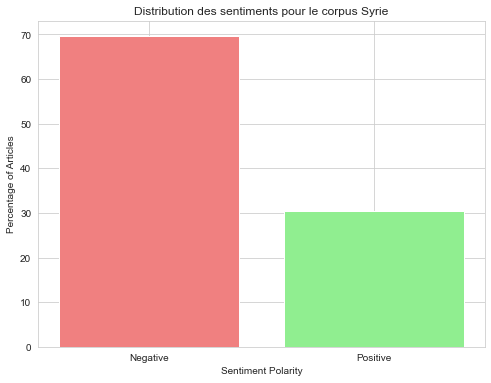

In [98]:
sentiment_counts = sentiment_df_syrie['label'].value_counts()

total_articles = sentiment_df_syrie.shape[0]
positive_percentage = (sentiment_counts['Positive'] / total_articles) * 100
negative_percentage = (sentiment_counts['Negative'] / total_articles) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Positive'], [negative_percentage, positive_percentage], color=['lightcoral', 'lightgreen'])
plt.title('Distribution des sentiments pour le corpus Syrie')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Percentage of Articles')
plt.show()

In [101]:
print(positive_percentage, negative_percentage)

30.376074687483516 69.62392531251649


### Afghanistan

In [103]:
sentiment_df_afghanistan=pd.read_excel("sentiment_afghanistan.xlsx")
sentiment_df_afghanistan

,title,article,sentiment
0,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler","[{'label': 'Positive', 'score': 0.6349100470542908}]"
1,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Envisagée initialement à Istanbul, la conférence entre Emmanuel Macron, la chancelière Angela Merkel, le premier ministre britannique Boris Johnso...","[{'label': 'Negative', 'score': 0.8275608420372009}]"
2,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...",Elle a duré un peu plus d'une heure,"[{'label': 'Negative', 'score': 0.84357088804245}]"
3,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Il s'agissait davantage d'entretenir le lien diplomatique que de parvenir à un résultat, tant les conditions sont défavorables","[{'label': 'Negative', 'score': 0.9093023538589478}]"
4,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Selon l'Elysée, la discussion a confirmé des convergences de vue déjà connues, notamment sur la situation à Idlib, en Syrie","[{'label': 'Positive', 'score': 0.5141595602035522}]"
...,...,...,...
37345,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Le ministre allemand de l'Intérieur, Horst Seehofer, a estimé que cette baisse de près d'un tiers des demande pouvait être partiellement expliqu...","[{'label': 'Negative', 'score': 0.5080079436302185}]"
37346,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Mays pour le ministre, conservateur et favorable à un plus strict contrôle des frontières, cette baisse, continue depuis depuis quatre ans, « mo...","[{'label': 'Positive', 'score': 0.7088020443916321}]"
37347,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Il y a cinq ans, l'ouverture des portes du pays décidée par la chancelière Angela Merkel lors de la crise migratoire européenne avait mené à env...","[{'label': 'Negative', 'score': 0.6412342190742493}]"
37348,Réforme de l'asile : Bruxelles espère des avancées en 2021,"La décision d'autoriser à nouveau, à partir de January 2021, les expulsions vers une Syrie dévastée par la guerre avait été vivement critiquée p...","[{'label': 'Negative', 'score': 0.5330063104629517}]"


In [104]:
sentiment_df_afghanistan['sentiment'] = sentiment_df_afghanistan['sentiment'].apply(lambda x: ast.literal_eval(x))

# Extracting label and score into separate columns
sentiment_df_afghanistan['label'] = sentiment_df_afghanistan['sentiment'].apply(lambda x: x[0]['label'])
sentiment_df_afghanistan['score'] = sentiment_df_afghanistan['sentiment'].apply(lambda x: x[0]['score'])

# Drop the original 'sentiment' column if needed
sentiment_df_afghanistan.drop(columns=['sentiment'], inplace=True)

sentiment_df_afghanistan

,title,article,label,score
0,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler",Positive,0.634910
1,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Envisagée initialement à Istanbul, la conférence entre Emmanuel Macron, la chancelière Angela Merkel, le premier ministre britannique Boris Johnso...",Negative,0.827561
2,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...",Elle a duré un peu plus d'une heure,Negative,0.843571
3,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Il s'agissait davantage d'entretenir le lien diplomatique que de parvenir à un résultat, tant les conditions sont défavorables",Negative,0.909302
4,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Selon l'Elysée, la discussion a confirmé des convergences de vue déjà connues, notamment sur la situation à Idlib, en Syrie",Positive,0.514160
...,...,...,...,...
37345,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Le ministre allemand de l'Intérieur, Horst Seehofer, a estimé que cette baisse de près d'un tiers des demande pouvait être partiellement expliqu...",Negative,0.508008
37346,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Mays pour le ministre, conservateur et favorable à un plus strict contrôle des frontières, cette baisse, continue depuis depuis quatre ans, « mo...",Positive,0.708802
37347,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Il y a cinq ans, l'ouverture des portes du pays décidée par la chancelière Angela Merkel lors de la crise migratoire européenne avait mené à env...",Negative,0.641234
37348,Réforme de l'asile : Bruxelles espère des avancées en 2021,"La décision d'autoriser à nouveau, à partir de January 2021, les expulsions vers une Syrie dévastée par la guerre avait été vivement critiquée p...",Negative,0.533006


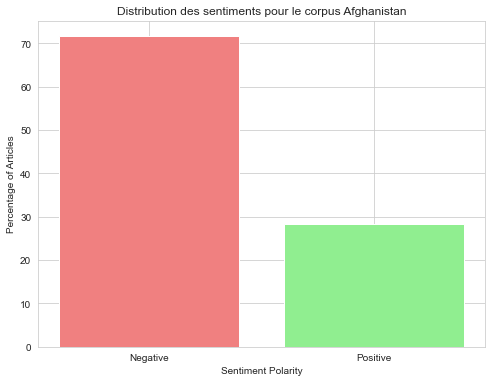

In [106]:
sentiment_counts = sentiment_df_afghanistan['label'].value_counts()

total_articles = sentiment_df_afghanistan.shape[0]
positive_percentage = (sentiment_counts['Positive'] / total_articles) * 100
negative_percentage = (sentiment_counts['Negative'] / total_articles) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Positive'], [negative_percentage, positive_percentage], color=['lightcoral', 'lightgreen'])
plt.title('Distribution des sentiments pour le corpus Afghanistan')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Percentage of Articles')
plt.show()

In [107]:
print(positive_percentage, negative_percentage)

28.310575635876837 71.68942436412316


### Ukraine

In [108]:
sentiment_df_ukraine=pd.read_excel("sentiment_ukraine.xlsx")
sentiment_df_ukraine

,title,article,sentiment
0,BHL : « Cette société française me fait peur »,"Vous avez entrepris, depuis quelques semaines, de vous rendre sur plusieurs théâtres de conflit","[{'label': 'Negative', 'score': 0.5771799087524414}]"
1,BHL : « Cette société française me fait peur »,"Oui, pour votre confrère « Paris-Match »","[{'label': 'Negative', 'score': 0.5900015830993652}]"
2,BHL : « Cette société française me fait peur »,"C'est une série de guerres relativement oubliées, mais qui, elles, ne nous oublient pas, car s'y dessine notre destin","[{'label': 'Positive', 'score': 0.9383765459060669}]"
3,BHL : « Cette société française me fait peur »,"Le Nigeria, où s'opère, dans l'indifférence générale, un massacre des chrétiens","[{'label': 'Negative', 'score': 0.6023626923561096}]"
4,BHL : « Cette société française me fait peur »,"Le Kurdistan syrien, où j'ai vu les premiers effets de l'ahurissant retrait militaire américain","[{'label': 'Positive', 'score': 0.5755218267440796}]"
...,...,...,...
25028,"Mark Rutte, le Hollandais gagnant",La France fait partie de ces passages clandestins,"[{'label': 'Positive', 'score': 0.6263477802276611}]"
25029,"Mark Rutte, le Hollandais gagnant","En l'absence d'imperium dur, en l'absence de chef d'orchestre, elle s'est montrée structurellement impuissante à dépenser moins","[{'label': 'Negative', 'score': 0.9412612915039062}]"
25030,"Mark Rutte, le Hollandais gagnant","Comprendre qu'il faut travailler plus et plus longtemps, et réduire la voilure d'une protection sociale devenue folle lui est, semble-t-il, imposs...","[{'label': 'Negative', 'score': 0.8868638873100281}]"
25031,"Mark Rutte, le Hollandais gagnant",C'est la défaite française,"[{'label': 'Negative', 'score': 0.7851486206054688}]"


In [109]:
sentiment_df_ukraine['sentiment'] = sentiment_df_ukraine['sentiment'].apply(lambda x: ast.literal_eval(x))

# Extracting label and score into separate columns
sentiment_df_ukraine['label'] = sentiment_df_ukraine['sentiment'].apply(lambda x: x[0]['label'])
sentiment_df_ukraine['score'] = sentiment_df_ukraine['sentiment'].apply(lambda x: x[0]['score'])

# Drop the original 'sentiment' column if needed
sentiment_df_ukraine.drop(columns=['sentiment'], inplace=True)

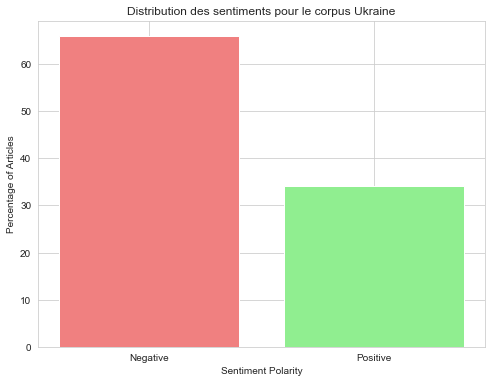

In [110]:
sentiment_counts = sentiment_df_ukraine['label'].value_counts()

total_articles = sentiment_df_ukraine.shape[0]
positive_percentage = (sentiment_counts['Positive'] / total_articles) * 100
negative_percentage = (sentiment_counts['Negative'] / total_articles) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Positive'], [negative_percentage, positive_percentage], color=['lightcoral', 'lightgreen'])
plt.title('Distribution des sentiments pour le corpus Ukraine')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Percentage of Articles')
plt.show()

In [111]:
print(positive_percentage, negative_percentage)

34.10697878799984 65.89302121200016


### Polarité à l'échelle du titre

In [45]:
articles_sentiment = []

# Iterating over each row in the DataFrame
for index, row in df.iterrows():
    try:
        titre = row['Titre']
        newspaper = row['CJournal']
        date = row['Date']
        content = row['Titre']
        sentiment = sentiment_analysis(content)
        articles_sentiment.append({'titre': titre,'sentiment': sentiment, 'date': date, 'journal': newspaper})
    except Exception as e:
        print(f"Error processing article at index {index}: {e}")

In [46]:
sentiment_df = pd.DataFrame(articles_sentiment)
sentiment_df

,titre,sentiment,date,journal
0,L'agenda caché de Moscou en Italie,"[{'label': 'Negative', 'score': 0.609222590923...",2020-03-30,Figaro
1,Récit Les trois semaines qui ont chamboulé l...,"[{'label': 'Positive', 'score': 0.529968202114...",2020-03-27,Monde
2,Élargissement de l’Union européenne à l’heure ...,"[{'label': 'Negative', 'score': 0.766176283359...",2020-03-26,Figaro
3,Coronavirus : les trois semaines qui ont chamb...,"[{'label': 'Negative', 'score': 0.597621440887...",2020-03-26,Monde
4,Marc Lazar : « Plus l’Italie fait nation face ...,"[{'label': 'Negative', 'score': 0.677632212638...",2020-03-25,Monde
...,...,...,...,...
8913,Crise migratoire aux Canaries : l'Europe doit...,"[{'label': 'Negative', 'score': 0.608736038208...",2020-05-27,Echos
8914,Migrants en mer Egée : «Ça a été les deux heur...,"[{'label': 'Positive', 'score': 0.821567595005...",2020-04-15,Croix
8915,"Migrants: Dakhla, point de départ du grand cou...","[{'label': 'Positive', 'score': 0.638566315174...",2020-04-14,Figaro
8916,Pacte migratoire?: les pays du sud sauveront-i...,"[{'label': 'Negative', 'score': 0.632294893264...",2020-04-12,Figaro


In [48]:
sentiment_df.to_excel('sentiment_title.xlsx', index=False)

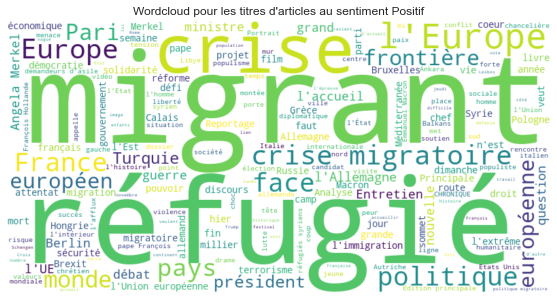

In [71]:
# Function to get sentiment polarity
def get_sentiment_polarity(sentiment):
    label = sentiment[0]['label']
    if label == 'Positive':
        return 1
    elif label == 'Negative':
        return -1
    else:
        return 0

# Apply sentiment analysis to each article
sentiment_df['sentiment_polarity'] = sentiment_df['sentiment'].apply(get_sentiment_polarity)

# Word Cloud
positive_articles = " ".join(sentiment_df[sentiment_df['sentiment_polarity'] == 1]['titre'])
negative_articles = " ".join(sentiment_df[sentiment_df['sentiment_polarity'] == -1]['titre'])

with open('stop_word_fr.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

# Generate Word Cloud for positive articles
wordcloud_positive = WordCloud(width=800, height=400, stopwords=stopwords, background_color ='white').generate(positive_articles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Wordcloud pour les titres d\'articles au sentiment Positif')
plt.axis('off')
plt.show()

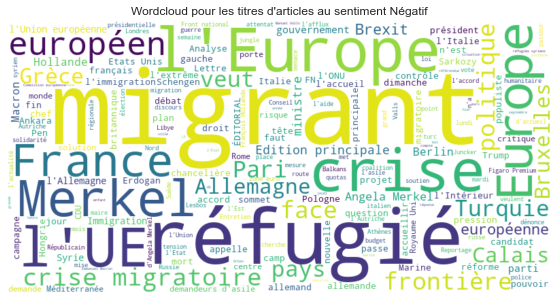

In [73]:
# Generate Word Cloud for negative articles
wordcloud_negative = WordCloud(width=800, height=400, stopwords=stopwords, background_color ='white').generate(negative_articles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Wordcloud pour les titres d\'articles au sentiment Négatif')
plt.axis('off')
plt.show()

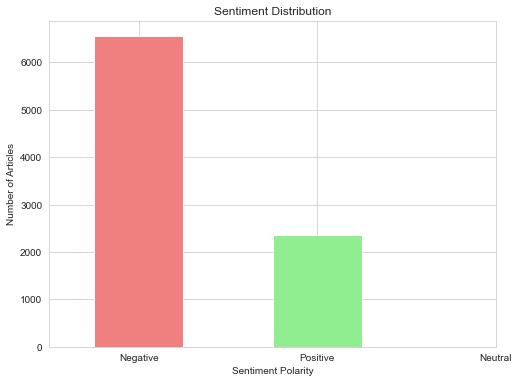

In [87]:
sentiment_counts = sentiment_df['sentiment_polarity'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=[ 'lightcoral', 'lightgreen', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Articles')
plt.xticks([0, 1, 2], [ 'Negative', 'Positive','Neutral'], rotation=0)
plt.show()

In [85]:
grouped_df

sentiment_polarity,-1,1
journal,,
Croix,438,359
Echos,943,321
Figaro,2420,610
Libération,626,280
Monde,1570,662
Parisien,554,135


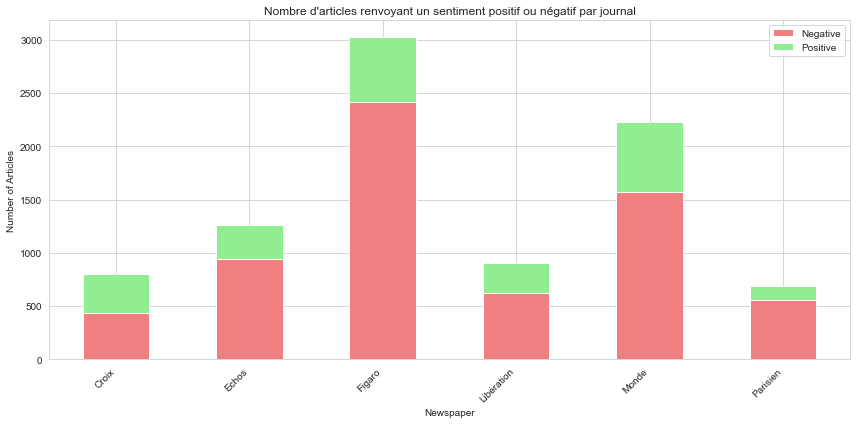

In [84]:
grouped_df = sentiment_df.groupby(['journal', 'sentiment_polarity']).size().unstack(fill_value=0)

# Plot with specified colors
colors = { -1: 'lightcoral', 1: 'lightgreen'}
grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in grouped_df.columns])
plt.title('Nombre d\'articles renvoyant un sentiment positif ou négatif par journal')
plt.xlabel('Newspaper')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
negatif=sentiment_df[sentiment_df["sentiment_polarity"]==-1]
negatif

,titre,sentiment,date,journal,sentiment_polarity
0,L'agenda caché de Moscou en Italie,"[{'label': 'Negative', 'score': 0.609222590923...",2020-03-30,Figaro,-1
2,Élargissement de l’Union européenne à l’heure ...,"[{'label': 'Negative', 'score': 0.766176283359...",2020-03-26,Figaro,-1
3,Coronavirus : les trois semaines qui ont chamb...,"[{'label': 'Negative', 'score': 0.597621440887...",2020-03-26,Monde,-1
4,Marc Lazar : « Plus l’Italie fait nation face ...,"[{'label': 'Negative', 'score': 0.677632212638...",2020-03-25,Monde,-1
5,Les sept infos non liées au coronavirus que vo...,"[{'label': 'Negative', 'score': 0.747376024723...",2020-03-20,Monde,-1
...,...,...,...,...,...
8910,Espagne : plus de 8000 migrants aux Canaries e...,"[{'label': 'Negative', 'score': 0.529679834842...",2020-06-25,Monde,-1
8912,Immigration?: l'Union européenne ménage le Maroc,"[{'label': 'Negative', 'score': 0.817849576473...",2020-06-08,Figaro,-1
8913,Crise migratoire aux Canaries : l'Europe doit...,"[{'label': 'Negative', 'score': 0.608736038208...",2020-05-27,Echos,-1
8916,Pacte migratoire?: les pays du sud sauveront-i...,"[{'label': 'Negative', 'score': 0.632294893264...",2020-04-12,Figaro,-1


In [63]:
pd.set_option('display.max_colwidth', 150)
print(negatif['titre'].head(50))

0                                                                                                                        L'agenda caché de Moscou en Italie
2                                                Élargissement de l’Union européenne à l’heure du Coronavirus: «une fuite en avant suicidaire dans le déni»
3                                                                     Coronavirus : les trois semaines qui ont chamboulé l’orthodoxie économique européenne
4                                                   Marc Lazar : « Plus l’Italie fait nation face à l’épidémie, plus elle s’éloigne de l’Union européenne »
5                                                                    Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine
6                                                                                       Géopolitique | chronique   Nous sommes tous des migrants contrariés
8                                                               

In [67]:
positif=sentiment_df[sentiment_df["sentiment_polarity"]==1]
positif

,titre,sentiment,date,journal,sentiment_polarity
1,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...","[{'label': 'Positive', 'score': 0.5299682021141052}]",2020-03-27,Monde,1
7,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","[{'label': 'Positive', 'score': 0.60658198595047}]",2020-03-19,Monde,1
16,Erdogan réclame plus de soutien de l'UE et de l'Otan,"[{'label': 'Positive', 'score': 0.5220890045166016}]",2020-03-09,Libération,1
23,Frans Timmermans : « Ce projet de loi est révolutionnaire »,"[{'label': 'Positive', 'score': 0.8695123195648193}]",2020-03-05,Figaro,1
25,Il faut défendre les frontières de l'Europe !,"[{'label': 'Positive', 'score': 0.5539216995239258}]",2020-03-03,Figaro,1
...,...,...,...,...,...
8903,"L'obstruction de Varsovie et Budapest, symbole d'une fracture entre deux Europe","[{'label': 'Positive', 'score': 0.604512095451355}]",2020-06-25,Parisien,1
8907,"En République démocratique du Congo, le grand retour des éléphants","[{'label': 'Positive', 'score': 0.6180530190467834}]",2020-06-25,Monde,1
8911,"« La Turquie d'Erdogan, ce laboratoire belliciste aux portes de l'Europe »","[{'label': 'Positive', 'score': 0.5465911626815796}]",2020-06-11,Figaro,1
8914,Migrants en mer Egée : «Ça a été les deux heures les plus longues de ma vie»,"[{'label': 'Positive', 'score': 0.8215675950050354}]",2020-04-15,Croix,1


In [68]:
pd.set_option('display.max_colwidth', 150)
print(positif['titre'].head(50))

1      Récit   Les trois semaines qui ont chamboulé l'orthodoxie économique européenne  Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...
7      Télésommet sur Idlib entre les Européens et Erdogan  La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...
16                                                                                                      Erdogan réclame plus de soutien de l'UE et de l'Otan
23                                                                                               Frans Timmermans : « Ce projet de loi est révolutionnaire »
25                                                                                                             Il faut défendre les frontières de l'Europe !
26     Syrie, un cauchemar sans fin  Des milliers de réfugiés syriens se pressent aux portes de l'Europe après l'ouverture par la Turquie de ses frontières.
39                                                        

In [75]:
filtered_articles_syria = filtered_articles_syria.rename(columns={'Titre': 'titre'})
merged_df_syria = pd.merge(sentiment_df, filtered_articles_syria, on='titre', how='inner')
merged_df_syria

,titre,sentiment,date,journal,sentiment_polarity,Journal,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
0,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"[{'label': 'Negative', 'score': 0.747376024723053}]",2020-03-20,Monde,-1,Le Monde (site web),2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,nde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une large,"véritable monde alternatif, serein et chaleureux, dans lequel se réfugier dans les semaines à venir.",Monde
1,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","[{'label': 'Positive', 'score': 0.60658198595047}]",2020-03-19,Monde,1,Le Monde,2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jégo et Piotr Smolar (à paris),"Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialem...","se tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialement","mmentaires, en rappelant « l'offensive militaire imprudente et impitoyable à Idlib » conduite par le",Monde
2,EN BREF,"[{'label': 'Negative', 'score': 0.8144431710243225}]",2020-03-12,Figaro,-1,"Le Figaro, no. 22442",2016-10-05,"Isaac, Jean-Baptiste",Menace d'attentat : un jeune homme de 18 ans mis en examen et écroué Un jeune homme de 18 ans soupçonné de vouloir commettre une attaque a été mis...,en examen et écroué Un jeune homme de 18 ans soupçonné de vouloir commettre une attaque a été mis en,": nécessité fait loi. Aux responsables politiques, il revient de faire un juste usage des frontières",Figaro
3,EN BREF,"[{'label': 'Negative', 'score': 0.8144431710243225}]",2020-03-12,Figaro,-1,"Le Figaro, no. 22530",2017-01-16,"Connan, Julie",L'EI progresse dans l'est de la Syrie L'État islamique a gagné du terrain ces dernières heures face aux forces du régime syrien dans la région de ...,mique a gagné du terrain ces dernières heures face aux forces du régime syrien dans la région de Deir,"pays avait reçu 90 000 demandes en 2015, au plus fort de la crisemigratoire, et avait décidé d'introd",Figaro
4,EN BREF,"[{'label': 'Negative', 'score': 0.8144431710243225}]",2020-03-12,Figaro,-1,"Le Figaro, no. 22326",2016-05-21,"Connan, Julie","UE : accord sur un mécanisme de suspension des exemptions de visas Du fait des craintes suscitées par la crisemigratoire, les ministres européens ...","emptions de visas Du fait des craintes suscitées par la crisemigratoire, les ministres européens de l",le chef de la police de San Francisco Greg Suhr a démissionné jeudi à la demande du maire de la ville,Figaro
...,...,...,...,...,...,...,...,...,...,...,...,...
3023,Allemagne?: prison à vie pour le néonazi meurtrier de Walter Lübcke,"[{'label': 'Negative', 'score': 0.5667627453804016}]",2020-12-06,Libération,-1,Libération,2020-12-06,NaN,"pages 20-21 S elon les manifestants, la marche du 22 Februaryen Algérie n'est pas seulement une commémoration du deuxième anniversaire du Hira...","e du 22 Februaryen Algérie n'est pas seulement une commémoration du deuxième anniversaire du Hirak, s","mulé, au cours des dix dernières années, un bagage d'expériences, de débats, parfois de polémiques, d",Libération
3024,Réforme de l'asile : Bruxelles espère des avancées en 2021,"[{'label': 'Negative', 'score': 0.706680953502655}]",2020-07-14,Figaro,-1,Le Figaro,2020-07-14,NaN,"Le nombre de demandes d'asile en Allemagne a baissé de 30% en 2020 par rapport à 2019, a annoncé dimanche 10 January le ministère de l'Intérieur, ...","sé de 30% en 2020 par rapport à 2019, a annoncé dimanche 10 January le ministère de l'Intérieur, aprè","s associations, malgré l'assurance du gouvernement que ne seront concernés uniquement ceux qu'il cons",Figaro
3025,L'Alle

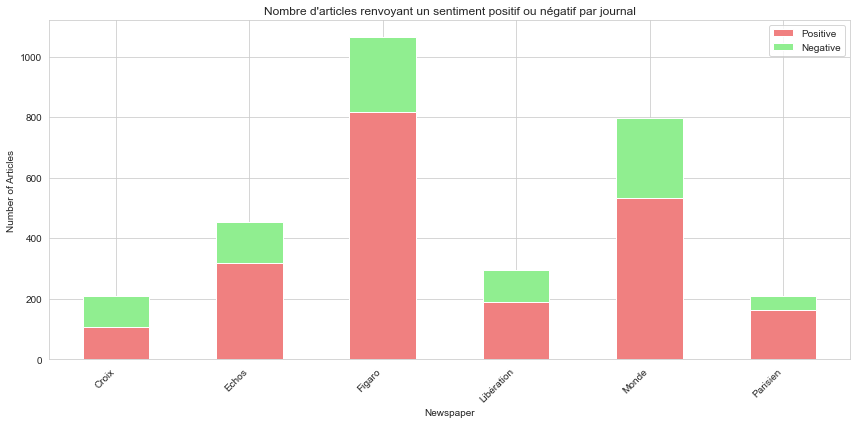

In [78]:
grouped_df = merged_df_syria.groupby(['journal', 'sentiment_polarity']).size().unstack(fill_value=0)
# Plot with specified colors
colors = {1: 'lightgreen', -1: 'lightcoral'}
grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in grouped_df.columns])
plt.title('Nombre d\'articles renvoyant un sentiment positif ou négatif par journal')
plt.xlabel('Newspaper')
plt.ylabel('Number of Articles')
plt.legend(['Positive', 'Negative'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Text Blob


https://github.com/Txolotl/Group4-Maya-Khaled-Diego-Sentiment-Analysis-with-CamemBERT-model/blob/main/camemBERT_Sentiment_Analysis.ipynb

#### Polarity

In [11]:
#!pip install textblob_fr

   ---------------------------------------- 561.2/561.2 kB 5.9 MB/s eta 0:00:00


In [69]:
AComment=[]
for comment in df['Texte'].apply(str):
    mots = []
    for word in  re.sub("\W"," ",comment ).split():
        mots.append(word)
    AComment.append(mots)


In [70]:
df['mots'] = AComment

In [71]:
df

,Unnamed: 0,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,crisis_term,mots
0,1,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les ...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,migrant_migratoire,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema..."
1,2,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"àric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,migrant_migratoire,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro..."
2,3,Le Figaro (site web),àlargissement de l'Union européenne à l'heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompris",es yeux et de se préparer au changement d'un monde plutôt que de s'enferrer dans des obsessions qui s,Figaro,migrant_migratoire,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T..."
3,4,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l'orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n'est pas si loin. Comme quoi, tous les tabous ne sont pas tombésâ¦",Monde,migrant_migratoire,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr..."
4,5,Le Monde (site web),"Marc Lazar : « Plus l'Italie fait nation face à l'épidémie, plus elle s'éloigne de l'Union européenne »",2020-03-25,Marc Lazar,Tribune. L'Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 00...,date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 000 personn,"t de la School of Government de la Luiss (Libre université internationale des études sociales, Rome).",Monde,migrant_migratoire,"[Tribune, L, Italie, est, le, pays, qui, enregistre, à, la, date, du, 25, mars, le, plus, grand, nombre, de, morts, dus, au, coronavirus, â, 6, 82..."
...,...,...,...,...,...,...,...,...,...,...,...
8021,8035,Libération,TUNISIE évacuation des réfugiés,2011-03-04,NaN,"Le monde s'organise face à la crisedesréfugiés qui secoue la Tunisie, que 95 000 personnes ont gagnée en venant de Libye entre le 20 février et l...","i secoue la Tunisie, que 95 000 personnes ont gagnée en venant de Libye entre le 20 février et le 2 m","hélicoptèr

In [72]:
stop_words=set(STOP_WORDS)

deselect_stop_words = ['n\'','plus','personne','aucun','ni','aucune','rien']
for w in deselect_stop_words:
    if w in stop_words:
        stop_words.remove(w)
    else:
        continue

In [73]:
AllfilteredComment=[]
for comment in df['mots']:
    filteredComment = [w for w in comment if not ((w in stop_words) or (len(w) == 1))]
    AllfilteredComment.append(' '.join(filteredComment))


df['motsFiltrer'] = AllfilteredComment

df.head(5)


,Unnamed: 0,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,crisis_term,mots,motsFiltrer
0,1,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les ...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,migrant_migratoire,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...
1,2,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"àric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,migrant_migratoire,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...
2,3,Le Figaro (site web),àlargissement de l'Union européenne à l'heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompris",es yeux et de se préparer au changement d'un monde plutôt que de s'enferrer dans des obsessions qui s,Figaro,migrant_migratoire,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux tat...
3,4,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l'orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n'est pas si loin. Comme quoi, tous les tabous ne sont pas tombésâ¦",Monde,migrant_migratoire,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...
4,5,Le Monde (site web),"Marc Lazar : « Plus l'Italie fait nation face à l'épidémie, plus elle s'éloigne de l'Union européenne »",2020-03-25,Marc Lazar,Tribune. L'Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 00...,date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 000 personn,"t de la School of Government de la Luiss (Libre un

In [74]:
senti_list = []
for i in df['motsFiltrer']:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')

df['sentiment'] = senti_list

df.head(5)

,Unnamed: 0,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,crisis_term,mots,motsFiltrer,sentiment
0,1,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les ...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,migrant_migratoire,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...,Positive
1,2,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"àric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,migrant_migratoire,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...,Positive
2,3,Le Figaro (site web),àlargissement de l'Union européenne à l'heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompris",es yeux et de se préparer au changement d'un monde plutôt que de s'enferrer dans des obsessions qui s,Figaro,migrant_migratoire,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux tat...,Positive
3,4,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l'orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n'est pas si loin. Comme quoi, tous les tabous ne sont pas tombésâ¦",Monde,migrant_migratoire,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...,Positive
4,5,Le Monde (site web),"Marc Lazar : « Plus l'Italie fait nation face à l'épidémie, plus elle s'éloigne de l'Union européenne »",2020-03-25,Marc Lazar,Tribune. L'Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 00...,date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 000 personn,"t de

In [75]:
df

,Unnamed: 0,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,crisis_term,mots,motsFiltrer,sentiment
0,1,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les ...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,migrant_migratoire,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...,Positive
1,2,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"àric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,migrant_migratoire,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...,Positive
2,3,Le Figaro (site web),àlargissement de l'Union européenne à l'heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompris",es yeux et de se préparer au changement d'un monde plutôt que de s'enferrer dans des obsessions qui s,Figaro,migrant_migratoire,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux tat...,Positive
3,4,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l'orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n'est pas si loin. Comme quoi, tous les tabous ne sont pas tombésâ¦",Monde,migrant_migratoire,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...,Positive
4,5,Le Monde (site web),"Marc Lazar : « Plus l'Italie fait nation face à l'épidémie, plus elle s'éloigne de l'Union européenne »",2020-03-25,Marc Lazar,Tribune. L'Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 00...,date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 000 personn,"t de

In [76]:
fig = px.histogram(df, x="sentiment",color="sentiment", width=1000)
fig.update_layout(
    title_text='Sentiment of reviews', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2,
    bargroupgap=0.1
)
fig.show()

C:\Users\arceb\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [77]:
df[df['Unnamed: 0'] == 8038]

,Unnamed: 0,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,crisis_term,mots,motsFiltrer,sentiment
8024,8038,"Libération, no. 9175","Reportage L'étrange aller-retour des Karens opprimés par la junte birmane Après un bref exil en Thaà¯lande, les réfugiés ayant fui les combats ...",2010-11-11,Arnaud DUBUS,"Ballots sur la tête, les bras chargés de sachets de nouilles ou le sac au dos, quelque 15 000 Birmans ont retraversé mardi après-midi le fleuve Mo...","de nouilles ou le sac au dos, quelque 15 000 Birmans ont retraversé mardi après-midi le fleuve Moei,",t des élections du week-end : la junte avait décidé de ne pas organiser de vote dans l'ensemble des d,Libération,asylum_refugee,"[Ballots, sur, la, tête, les, bras, chargés, de, sachets, de, nouilles, ou, le, sac, au, dos, quelque, 15, 000, Birmans, ont, retraversé, mardi, a...",Ballots tête bras chargés sachets nouilles sac dos 15 000 Birmans retraversé mardi midi fleuve Moei marque frontière Thaà lande Birmanie calmement...,Negative


In [78]:
selected_text = df[df['Unnamed: 0'] == 8038]['Texte'].iloc[0]
print(selected_text)

Ballots sur la tête, les bras chargés de sachets de nouilles ou le sac au dos, quelque 15 000 Birmans ont retraversé mardi après-midi le fleuve Moei, qui marque la frontière entre la Thaà¯lande et la Birmanie, faisant calmement, et en sens inverse, le trajet qu'ils avaient effectué la veille dans la panique et la confusion.   La crisedesréfugiés de Mae Sot, du nom de la ville frontalière thaà¯landaise ou ces Birmans s'étaient réfugiés lundi pour échapper à  des affrontements entre une faction armée de l'ethnie karen et l'armée gouvernementale birmane, n'aura duré qu'un jour. Il a suffi que des leaders militaires thaà¯landais annoncent aux réfugiés, regroupés sur la pelouse d'un terrain de football, que la situation était redevenue normale dans la ville birmane de Myawaddy, pour que les Birmans décident de rentrer chez eux.  «Ils ne veulent pas rester  Sur  Ce terrain de football Oà¹ ils n'ont rien à  faire. Ils veulent rentrer chez eux pour surveiller leurs maisons et s'occuper de leur

In [79]:
selected_text = df[df['Unnamed: 0'] == 971]['Texte'].iloc[0]
print(selected_text)

La crise migratoire a confirmé l'hégémonie de Berlin sur une Union européenne toujours plus divisée et impuissante. Ce leadership, longtemps économique, est devenu politique et même moral. L'été dernier, c'est Angela Merkel qui, en affirmant au nom même des valeurs dont l'Europe est porteuse sa détermination à  accueillir les réfugiés, renforça l'afflux de Syriens fuyant la guerre et les soudards du «boucher de Damas». C'est elle qui, quasi solitaire, s'est activée pour trouver une solution, certes très ambiguà«, à  une crise qui risquait de faire voler en éclats l'espace Schengen et le projet européen. Evoquant début mars dans un langage familier dont elle est peu coutumière  «[son] foutu devoir et [son] obligation pour que l'Europe trouve un chemin ensemble», la pragmatique chancelière a été le maà®tre d'oeuvre de l'accord des Vingt-Huit avec Ankara pour fixer le flux des migrants.  «Il y a aujourd'hui à  nouveau une question allemande en Europe», analyse Hans Stark, responsable du C

In [80]:
df

,Unnamed: 0,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,crisis_term,mots,motsFiltrer,sentiment
0,1,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les ...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,migrant_migratoire,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...,Positive
1,2,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"àric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,migrant_migratoire,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...,Positive
2,3,Le Figaro (site web),àlargissement de l'Union européenne à l'heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompris",es yeux et de se préparer au changement d'un monde plutôt que de s'enferrer dans des obsessions qui s,Figaro,migrant_migratoire,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux tat...,Positive
3,4,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l'orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n'est pas si loin. Comme quoi, tous les tabous ne sont pas tombésâ¦",Monde,migrant_migratoire,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...,Positive
4,5,Le Monde (site web),"Marc Lazar : « Plus l'Italie fait nation face à l'épidémie, plus elle s'éloigne de l'Union européenne »",2020-03-25,Marc Lazar,Tribune. L'Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 00...,date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 000 personn,"t de

On peut observer que la dimension "négative" n'est pas forcément pertinente dans tous les cas car le registre négatif peut se porter sur les

In [81]:
print(df.columns)

Index(['Unnamed: 0', 'Journal', 'Titre', 'Date', 'Auteur', 'Texte',
       'extrait_debut', 'extrait_fin', 'CJournal', 'crisis_term', 'mots',
       'motsFiltrer', 'sentiment'],
      dtype='object')


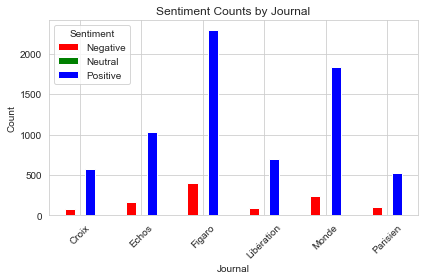

In [86]:
journal_sentiment_counts = df.groupby(['CJournal', 'sentiment']).size().unstack(fill_value=0)

# Counting sentiment occurrences for each crisis term
crisis_term_sentiment_counts = df.groupby(['crisis_term', 'sentiment']).size().unstack(fill_value=0)


# Define color palette
colors = ['red', 'green', 'blue']

# Plotting sentiment for each simplified Journal
journal_sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Counts by Journal')
plt.xlabel('Journal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [83]:
journal_sentiment_counts

sentiment,Negative,Neutral,Positive
CJournal,,,
Autre,94,1,625
Croix,83,0,574
Echos,65,0,408
Figaro,397,0,2298
Libération,92,0,691
Monde,236,1,1840
Parisien,96,0,525


Même si c'est très léger on voit que dans l'ensemble le sentiment est plutôt négatifs pour les journaux de droite que pour les journaux de gauche. Pour ce qui concerne le terme sélectionné pour scrapper les documents, le sentiment est plus négatif pour migrant/migratoire que pour refugee/asylum.

<Figure size 720x360 with 0 Axes>

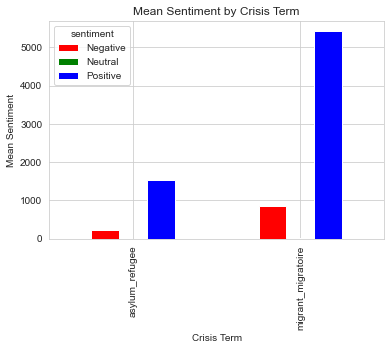

In [88]:
# Plotting sentiment for each crisis term
plt.figure(figsize=(10, 5))
# Define color palette
colors = ['red', 'green', "blue"]
crisis_term_sentiment_counts.plot(kind='bar', color=colors)
plt.title('Mean Sentiment by Crisis Term')
plt.xlabel('Crisis Term')
plt.ylabel('Mean Sentiment')
plt.show()

In [89]:
crisis_term_sentiment_counts

sentiment,Negative,Neutral,Positive
crisis_term,,,
asylum_refugee,214,0,1542
migrant_migratoire,849,2,5419


In [93]:
grouped_sentiment_counts

sentiment                      Negative  Neutral  Positive
CJournal   crisis_term                                    
Croix      asylum_refugee            15        0       132
           migrant_migratoire        68        0       442
Echos      asylum_refugee             0        0         2
           migrant_migratoire       159        1      1031
Figaro     asylum_refugee            87        0       507
           migrant_migratoire       310        0      1791
Libération asylum_refugee            22        0       209
           migrant_migratoire        70        0       482
Monde      asylum_refugee            76        0       611
           migrant_migratoire       160        1      1229
Parisien   asylum_refugee            14        0        81
           migrant_migratoire        82        0       444

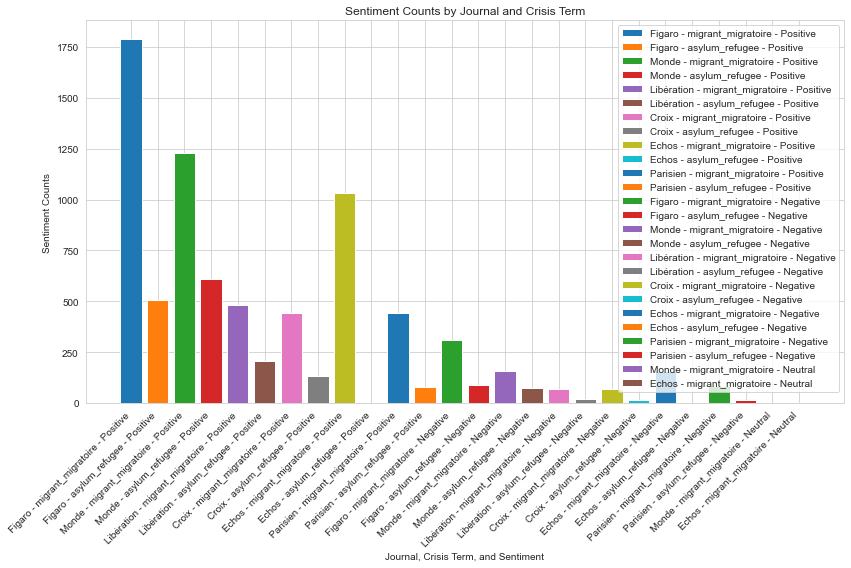

In [102]:
grouped_sentiment_counts = df.groupby(['CJournal', 'crisis_term', 'sentiment']).size().unstack(fill_value=0)

# Plotting sentiment for each Simplified Journal and crisis term
plt.figure(figsize=(12, 8))

# Iterate over each sentiment category
for sentiment in df['sentiment'].unique():
    # Subset the DataFrame for the specific sentiment
    df_sentiment = df[df['sentiment'] == sentiment]
    # Group by 'CJournal', 'crisis_term', and calculate sentiment counts
    grouped_sentiment_counts = df_sentiment.groupby(['CJournal', 'crisis_term']).size().unstack(fill_value=0)

    # Iterate over unique newspapers and crisis terms
    for journal in df['CJournal'].unique():
        for crisis_term in df['crisis_term'].unique():
            try:
                # Get sentiment count for the specific combination
                sentiment_count = grouped_sentiment_counts.loc[journal, crisis_term]
                # Plotting the sentiment count
                plt.bar(f"{journal} - {crisis_term} - {sentiment}", sentiment_count, label=f"{journal} - {crisis_term} - {sentiment}")
            except KeyError:
                pass

plt.title('Sentiment Counts by Journal and Crisis Term')
plt.xlabel('Journal, Crisis Term, and Sentiment')
plt.ylabel('Sentiment Counts')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


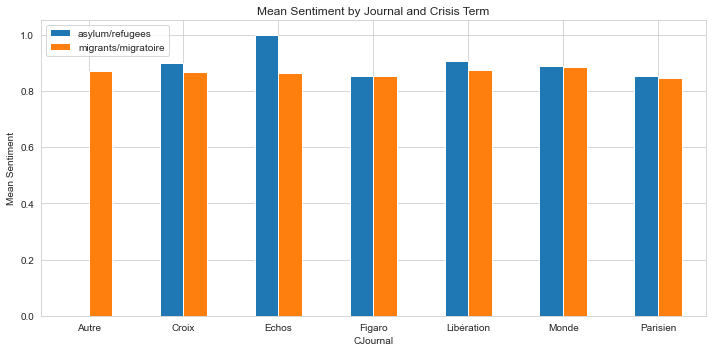

In [63]:
# Adding a 'Key' column to indicate the categories (here, 'Pauvres' and 'Autres')
df['Key'] = df['crisis_term'].apply(lambda x: 'migrants/migratoire' if x == 'migrant_migratoire' else 'asylum/refugees')

# Grouping by 'Simplified_Journal' and 'Key' and calculating mean sentiment
grouped_sentiment = df.groupby(['CJournal', 'Key'])['sentiment'].mean().unstack()

# Plotting sentiment for each Simplified Journal and Key
ax = grouped_sentiment.plot(kind='bar', ylabel='Mean Sentiment', title='Mean Sentiment by Journal and Crisis Term', figsize=(10, 5), rot=0)
plt.legend(['asylum/refugees', 'migrants/migratoire'], loc='upper left')
plt.tight_layout()
plt.show()

In [103]:
df['sentiment'] = df['sentiment'].replace('Positive',1)
df['sentiment'] = df['sentiment'].replace('Neutral',2)
df['sentiment'] = df['sentiment'].replace('Negative',0)

C:\Users\arceb\AppData\Local\Temp\ipykernel_2988\3213211793.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [104]:
df.drop( df[ df['sentiment'] == 2 ].index, inplace=True)

#### Subjectivity

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [120]:
subjectivities = []

for text in df['motsFiltrer']:
    blob = tb(text)
    subjectivity = blob.subjectivity
    subjectivities.append(subjectivity)

# Add subjectivities to DataFrame
df['subjectivity'] = subjectivities

In [121]:
df

,Unnamed: 0,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,crisis_term,mots,motsFiltrer,sentiment,subjectivity
0,1,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les ...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,migrant_migratoire,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...,1,0.450000
1,2,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"àric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,migrant_migratoire,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...,1,0.512963
2,3,Le Figaro (site web),àlargissement de l'Union européenne à l'heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L'incompris",es yeux et de se préparer au changement d'un monde plutôt que de s'enferrer dans des obsessions qui s,Figaro,migrant_migratoire,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux tat...,1,0.000000
3,4,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l'orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n'est pas si loin. Comme quoi, tous les tabous ne sont pas tombésâ¦",Monde,migrant_migratoire,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...,1,0.512963
4,5,Le Monde (site web),"Marc Lazar : « Plus l'Italie fait nation face à l'épidémie, plus elle s'éloigne de l'Union européenne »",2020-03-25,Marc Lazar,Tribune. L'Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de 69 00...,date du 25 mars le plus grand nombre de morts dus au coronavirus â 6 820 â et plus de

In [122]:
selected_text = df[df['Unnamed: 0'] == 15]['Texte'].iloc[0]
print(selected_text)

Le président turc Recep Tayyip Erdogan a demandé à  l'Otan son « soutien concret » dans le conflit en Syrie, lors d'une visite à  Bruxelles lundi.   » LIRE AUSSI - Afflux explosif de migrants à  la frontière gréco-turque     « Nous attendons un soutien concret de la part de tous nos alliés », a lancé le dirigeant après une rencontre avec le secrétaire général de l'Otan Jens Stoltenberg. « L'Otan est dans un processus critique dans lequel elle doit clairement montrer sa solidarité d'alliance » avec la Turquie, a ajouté M. Erdogan.  Ankara souhaite que l'Otan applique pleinement ses décisions prises entre 2012 et 2015 de soutenir la défense aérienne turque, a-t-il expliqué. La visite de M. Erdogan dans la capitale de l'UE intervient après sa décision d'ouvrir les frontières turques au passage des migrants et des réfugiés qui se trouvent sur son territoire, pour forcer les pays européens à  « apporter leur soutien aux solutions politiques et humanitaires turques en Syrie ».   La Turquie a

In [123]:
selected_text = df[df['Unnamed: 0'] == 19]['Texte'].iloc[0]
print(selected_text)

Face aux conditions de vie précaires des migrants dans les à®les grecques, l'Allemagne prend la tête d'une coalition de pays européens «?volontaires?» à  l'accueil de mineurs.   Une coalition de pays « volontaires » de l'Union européenne envisage de prendre en charge jusqu'à  1 500 enfants migrants actuellement bloqués sur les à®les grecques, par mesure de soutien « humanitaire », a annoncé lundi 9 mars le gouvernement allemand.  ? REPORTAGE. é Paris, offrir un peu de répit aux jeunes migrants isolés   « Nous voulons aider la Grèce à  faire face à  la situation humanitaire difficile de 1 000 à  1 500 enfants se trouvant sur les à®les » du pays, ont ajouté les partis de la coalition gouvernementale de la chancelière Angela Merkel, conservateurs et sociaux-démocrates, à  l'issue d'une réunion de plusieurs heures qui avait commencé dimanche soir. « Il s'agit d'enfants qui, en raison d'une maladie ont urgemment besoin de soins, ou d'enfants non accompagnés et à¢gés de moins de 14 ans, pour

#### Learning

In [105]:
# Defining constants
epochs = 5
MAX_LEN = 128
batch_size = 1
device = torch.device('cuda')

In [106]:
# Initialize CamemBERT tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base',do_lower_case=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [107]:
# Creates list of texts and labels
text = df['Texte'].to_list()
labels = df['sentiment'].to_list()

#user tokenizer to convert sentences into tokenizer
input_ids  = [tokenizer.encode(sent,add_special_tokens=True,truncation=True,max_length=MAX_LEN) for sent in text]

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

In [108]:
tokenizer.encode?

In [109]:
input_ids

array([[    5,  5311, 23196, ..., 23808,     9,     6],
       [    5,  3289,     7, ...,  6401,    14,     6],
       [    5,  4498,    21, ..., 27906,  6599,     6],
       ...,
       [    5,  6899,    25, ...,    56,    15,     6],
       [    5, 11366,  7043, ..., 21124,  6841,     6],
       [    5,   795,   193, ...,    16,   454,     6]])

In [110]:

# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=42, test_size=0.1)

# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [111]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=2)
model.to(device)

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
type(model)

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5, eps=10e-8)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# Store our loss and accuracy for plotting if we want to visualize training evolution per epochs after the training process
train_loss_set = []

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
    # Tracking variables for training
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

    # Train the model
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Add batch to device CPU or GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        outputs = model(b_input_ids,token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        # Get loss value
        loss = outputs[0]
        # Add it to train loss list
        train_loss_set.append(loss.item())
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()

        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))




    # Tracking variables for validation
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Validation of the model
    model.eval()
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Add batch to device CPU or GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            outputs =  model(b_input_ids,token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss, logits = outputs[:2]

        # Move logits and labels to CPU if GPU is used
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

print("Model saved!")
torch.save(model.state_dict(), "/content/drive/MyDrive/truspilot_category_data/sentiments_pytorch.pt")

### FLAUBERT

In [113]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

loaded_tokenizer = AutoTokenizer.from_pretrained('flaubert/flaubert_large_cased')
loaded_model = AutoModelForSequenceClassification.from_pretrained("DemangeJeremy/4-sentiments-with-flaubert")

nlp = pipeline('sentiment-analysis', model=loaded_model, tokenizer=loaded_tokenizer)

pytorch_model.bin:   0%|          | 0.00/1.49G [00:00<?, ?B/s]

C:\Users\arceb\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\arceb\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



In [115]:
# Creating an empty list to store the results
articles_sentiment = []

# Iterating over each row in the DataFrame
for index, row in df.iterrows():
    try:
        content = row['Titre']
        sentiment = nlp(content)
        articles_sentiment.append({'article': content, 'sentiment': sentiment})
    except Exception as e:
        print(f"Error processing article at index {index}: {e}")

KeyboardInterrupt: 

In [116]:
articles_sentiment

[{'article': "L'agenda caché de Moscou en Italie",
  'sentiment': [{'label': 'POSITIVE', 'score': 0.6883031129837036}]},
 {'article': "Récit   Les trois semaines qui ont chamboulé l'orthodoxie économique européenne  Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la réforme de la zone euro, dont la solidité est mise à\xa0 mal par la pandémie",
  'sentiment': [{'label': 'MIXED', 'score': 0.4768875241279602}]},
 {'article': "à\x89largissement de l'Union européenne à\xa0 l'heure du Coronavirus: «une fuite en avant suicidaire dans le déni»",
  'sentiment': [{'label': 'MIXED', 'score': 0.40838807821273804}]},
 {'article': "Coronavirus\xa0: les trois semaines qui ont chamboulé l'orthodoxie économique européenne",
  'sentiment': [{'label': 'OBJECTIVE', 'score': 0.4552094638347626}]},
 {'article': "Marc Lazar\xa0: «\xa0Plus l'Italie fait nation face à\xa0 l'épidémie, plus elle s'éloigne de l'Union européenne\xa0»",
  'sentiment': [{'label': 'OBJECTIVE', 'score': 0.5507673621177673